
# **XG BOOST에 필요한 라이브러리 호출**


In [1]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

# **데이터 불러오기**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE3.csv', encoding='euc-kr')

In [6]:
df

,Unnamed: 0,ACPT_YM,PLCST_NM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
0,0,201901,서울중랑경찰서,37,6,8,4,5,6,3,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
1,1,201901,서울노원경찰서,62,6,6,13,7,16,5,...,468,1776,770,253,108,서울특별시 노원구 노원로 283(하계동),서울특별시,노원구,37.641975,127.070799
2,2,201901,부산해운대경찰서,37,3,5,7,6,3,8,...,300,1104,482,142,95,부산광역시 해운대구 달맞이길62번길 42(중동),부산광역시,해운대구,35.158240,129.171762
3,3,201901,울산중부경찰서,56,7,6,9,8,4,11,...,387,1396,649,173,72,울산광역시 중구 번영로 620(남외동),울산광역시,중구,35.569829,129.349216
4,4,201901,대구성서경찰서,24,6,1,5,0,5,2,...,212,862,362,125,54,대구광역시 달서구 달구벌대로259길 15(이곡동),대구광역시,달서구,35.853219,128.508774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,8522,202112,인천논현경찰서,39,8,1,7,1,4,4,...,274,1010,516,139,60,인천광역시 남동구 논현고잔로 239,인천광역시,남동구,37.404077,126.715039
8523,8523,202112,부산중부경찰서,19,0,1,0,2,6,4,...,30,103,36,5,6,부산광역시 중구 중앙대로 105(대창동1가),부산광역시,중구,35.107421,129.035925
8524,8524,202112,대전서부경찰서,20,4,3,1,4,3,2,...,247,1029,473,133,69,대전광역시 서구 복수서로 47(복수동),대전광역시,서구,36.309045,127.373459
8525,8525,202112,함안경찰서,1,0,1,0,0,0,0,...,33,87,58,13,4,경상남도 함안군 가야읍 가야로 85,경상남도,함안군,35.279147,128.410910


# **XG BOOST에 필요한 변수 생성**

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target ,test_size=0.2)

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)

In [7]:
print(df.keys())

Index(['Unnamed: 0', 'ACPT_YM', 'PLCST_NM', 'RPRT_CASCNT_WHOL',
       'OCRN_DOTW_SNDD', 'OCRN_DOTW_MON', 'OCRN_DOTW_TUE', 'OCRN_DOTW_WED',
       'OCRN_DOTW_THU', 'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT', 'TIZN_1', 'TIZN_2',
       'TIZN_3', 'TIZN_4', 'SCHOOL_RPRT_CASCNT_WHOL', 'SCHOOL_OCRN_DOTW_SNDD',
       'SCHOOL_OCRN_DOTW_MON', 'SCHOOL_OCRN_DOTW_TUE', 'SCHOOL_OCRN_DOTW_WED',
       'SCHOOL_OCRN_DOTW_THU', 'SCHOOL_OCRN_DOTW_FRI', 'SCHOOL_OCRN_DOTW_SAT',
       'SCHOOL_TIZN_1', 'SCHOOL_TIZN_2', 'SCHOOL_TIZN_3', 'SCHOOL_TIZN_4',
       'STRD_YR', 'CHILD_RPRT_CASCNT_WHOL', 'CHILD_DSTVC_RPRT_CNT',
       'CHILD_CHLAB_ASMP', 'CHILD_CHLAB_ETC', 'CHILD_OCRN_DOTW_SNDD',
       'CHILD_OCRN_DOTW_MON', 'CHILD_OCRN_DOTW_TUE', 'CHILD_OCRN_DOTW_WED',
       'CHILD_OCRN_DOTW_THU', 'CHILD_OCRN_DOTW_FRI', 'CHILD_OCRN_DOTW_SAT',
       'CHILD_TIZN_1', 'CHILD_TIZN_2', 'CHILD_TIZN_3', 'CHILD_TIZN_4', 'ADDR',
       'SI', 'SGG', 'LON', 'LAT'],
      dtype='object')


In [8]:
df.plcst = df['PLCST_NM'].unique()
df.plcst
print(df.plcst)
print(len(df.plcst))

['서울중랑경찰서' '서울노원경찰서' '부산해운대경찰서' '울산중부경찰서' '대구성서경찰서' '전주완산경찰서' '대전중부경찰서'
 '삼척경찰서' '괴산경찰서' '서산경찰서' '금산경찰서' '영주경찰서' '남양주경찰서' '동두천경찰서' '화성동탄경찰서'
 '제주자치경찰단' '천안동남경찰서' '부천소사경찰서' '이천경찰서' 'ETC' '서울방배경찰서' '동해경찰서' '진천경찰서'
 '마산중부경찰서' '남해경찰서' '무주경찰서' '창원중부경찰서' '서대문경찰서' '서울용산경찰서' '서울성북경찰서' '성동경찰서'
 '서울강서경찰서' '부산동부경찰서' '대구북부경찰서' '인천서부경찰서' '연수경찰서' '울산남부경찰서' '동부경찰서'
 '서울광진경찰서' '울산울주경찰서' '광주북부경찰서' '인천삼산경찰서' '속초경찰서' '포항남부경찰서' '진해경찰서' '정읍경찰서'
 '양주경찰서' '포천경찰서' '가평경찰서' '일산서부경찰서' '수원중부경찰서' '안양동안경찰서' '군포경찰서' '성남수정경찰서'
 '의왕경찰서' '하남경찰서' '여주경찰서' '횡성경찰서' '고흥경찰서' '담양경찰서' '서울수서경찰서' '인천중부경찰서'
 '전주덕진경찰서' '대전동부경찰서' '제주서부경찰서' '김해중부경찰서' '태백경찰서' '양구경찰서' '충주경찰서' '서천경찰서'
 '여수경찰서' '서귀포경찰서' '구리경찰서' '태안경찰서' '오산경찰서' '천안서북경찰서' '대구강북경찰서' '대전유성경찰서'
 '수원남부경찰서' '안양만안경찰서' '광명경찰서' '안산단원경찰서' '용인동부경찰서' '김포경찰서' '서울서초경찰서'
 '부산사상경찰서' '부산연제경찰서' '광주동부경찰서' '강진경찰서' '서울남대문경찰서' '옥천경찰서' '단양경찰서' '의성경찰서'
 '영등포경찰서' '부산동래경찰서' '부산사하경찰서' '광주남부경찰서' '대전대덕경찰서' '강릉경찰서' '당진경찰서' '진주경찰서'
 '통영경찰서' '거제경찰서' '함양경찰서' '광양경찰서' '일산동부경찰서' '기장경찰서' '세종경찰서' '용인서부경찰서'
 

In [9]:
df0 = df.set_index('PLCST_NM')

In [10]:
df0

,Unnamed: 0,ACPT_YM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,OCRN_DOTW_SAT,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
PLCST_NM,,,,,,,,,,,,,,,,,,,,,
서울중랑경찰서,0,201901,37,6,8,4,5,6,3,5,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울노원경찰서,1,201901,62,6,6,13,7,16,5,9,...,468,1776,770,253,108,서울특별시 노원구 노원로 283(하계동),서울특별시,노원구,37.641975,127.070799
부산해운대경찰서,2,201901,37,3,5,7,6,3,8,5,...,300,1104,482,142,95,부산광역시 해운대구 달맞이길62번길 42(중동),부산광역시,해운대구,35.158240,129.171762
울산중부경찰서,3,201901,56,7,6,9,8,4,11,11,...,387,1396,649,173,72,울산광역시 중구 번영로 620(남외동),울산광역시,중구,35.569829,129.349216
대구성서경찰서,4,201901,24,6,1,5,0,5,2,5,...,212,862,362,125,54,대구광역시 달서구 달구벌대로259길 15(이곡동),대구광역시,달서구,35.853219,128.508774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천논현경찰서,8522,202112,39,8,1,7,1,4,4,14,...,274,1010,516,139,60,인천광역시 남동구 논현고잔로 239,인천광역시,남동구,37.404077,126.715039
부산중부경찰서,8523,202112,19,0,1,0,2,6,4,6,...,30,103,36,5,6,부산광역시 중구 중앙대로 105(대창동1가),부산광역시,중구,35.107421,129.035925
대전서부경찰서,8524,202112,20,4,3,1,4,3,2,3,...,247,1029,473,133,69,대전광역시 서구 복수서로 47(복수동),대전광역시,서구,36.309045,127.373459


In [11]:
df.plcst[0]

'서울중랑경찰서'

In [12]:
df0.loc[df.plcst[0],:]

,Unnamed: 0,ACPT_YM,RPRT_CASCNT_WHOL,OCRN_DOTW_SNDD,OCRN_DOTW_MON,OCRN_DOTW_TUE,OCRN_DOTW_WED,OCRN_DOTW_THU,OCRN_DOTW_FRI,OCRN_DOTW_SAT,...,CHILD_OCRN_DOTW_SAT,CHILD_TIZN_1,CHILD_TIZN_2,CHILD_TIZN_3,CHILD_TIZN_4,ADDR,SI,SGG,LON,LAT
PLCST_NM,,,,,,,,,,,,,,,,,,,,,
서울중랑경찰서,0,201901,37,6,8,4,5,6,3,5,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,233,201902,56,6,8,2,7,11,6,16,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,466,201903,125,22,23,17,11,14,17,21,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,708,201904,102,12,13,18,12,16,18,13,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,939,201905,174,16,14,24,33,26,31,30,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1189,201906,224,48,28,24,21,21,31,51,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1435,201907,130,23,19,12,26,17,15,18,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1682,201908,163,22,18,12,24,19,37,31,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468
서울중랑경찰서,1934,201909,199,55,28,22,28,21,21,24,...,403,1617,630,181,83,서울특별시 중랑구 신내역로3길 40-10(신내동),서울특별시,중랑구,37.618254,127.104468



# **for문 이용하여 경찰서별 XG BOOST 모델 학습**

In [13]:
## 제주경찰청 데이터가 두개밖에 없어서 test size가 0.5 이하로 나와서 에러가 생기는 것 같다
## if len(df_i) < 3 이면 학습모델 실행하지 않고 preds_i = 0 찍고 넘어가는 것으로 개선

In [14]:
## 교통과 데이터는 하나 뿐이라 len(df0.loc[df.plcst[253],:]) 찍었을때 1이 아니라 컬럼갯수인 47이 출력됨.
## 고성경찰서 항목에서 이상한 점 발견
## 12개월씩 3년 데이터면 최대 36개 데이터가 나올 수 있는데 고성경찰서는 120개 조회
## if len(df_i) > 36 이면 이상치 데이터로 보고 학습모델 실행하지 않고 넘어가는 것으로 개선

In [15]:
df0.loc[df.plcst[253],:]
len(df0.loc[df.plcst[253],:])

47

In [16]:
#  빈 리스트를 하나 만들어주고 반복문마다 결과를 추가
preds = []

In [17]:
for i in range(len(df.plcst)):
  print(i,".", df.plcst[i])
  df_i = df0.loc[df.plcst[i],:]
  if len(df_i) < 3:
    preds_i = [0]
    preds.append(preds_i)
    print("12월 예상 건수:", preds_i)
    continue
  if len(df_i) > 36:
    preds_i = [0]
    preds.append(preds_i)
    print("12월 예상 건수:", preds_i)
    continue
  df1 = df_i[df_i['ACPT_YM'] < 202112]
  df2 = df_i[df_i['ACPT_YM'] == 202112]
  df1.data = df1.drop(columns=['Unnamed: 0', 'OCRN_DOTW_THU', 'ADDR', 'SI', 'SGG'])
  df2.data = df2.drop(columns=['Unnamed: 0', 'OCRN_DOTW_THU', 'ADDR', 'SI', 'SGG' ])
  df1.target = pd.DataFrame(df1['OCRN_DOTW_THU'])
  df2.target = pd.DataFrame(df2['OCRN_DOTW_THU'])
  X_train, X_test, y_train, y_test = train_test_split(df1.data, df1.target ,test_size=0.2)
  xgb_model = xgboost.XGBRegressor(objective = 'reg:linear', n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
  xgb_model.fit(X_train,y_train)
  pred_test = xgb_model.predict(X_test)
  preds_i = xgb_model.predict(df2.data)
  if preds_i < 0:
    preds_i = [0]
  preds.append(preds_i)
  print("12월 예상 건수:", preds_i)
  print("12월 실제 건수", df2.target['OCRN_DOTW_THU'])

0 . 서울중랑경찰서
[13:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [9.97962]
12월 실제 건수 PLCST_NM
서울중랑경찰서    13
Name: OCRN_DOTW_THU, dtype: int64
1 . 서울노원경찰서
[13:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [8.249354]
12월 실제 건수 PLCST_NM
서울노원경찰서    5
Name: OCRN_DOTW_THU, dtype: int64
2 . 부산해운대경찰서
[13:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [6.5739694]
12월 실제 건수 PLCST_NM
부산해운대경찰서    10
Name: OCRN_DOTW_THU, dtype: int64
3 . 울산중부경찰서
[13:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
12월 예상 건수: [7.078248]
12월 실제 건수 PLCST_NM
울산중부경찰서    5
Name: OCRN_DOTW_THU, dtype: int64
4 . 대구성서경찰서
[13:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:line

In [18]:
preds = pd.DataFrame(preds)
preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       231 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [19]:
preds.isnull().sum()

0    44
dtype: int64

In [20]:
## 결측치 0으로 fillna 로 처리, index와 칼럼명 지정
preds.fillna(0, inplace = True)

preds.rename(columns={0: 'preds'}, inplace=True)
preds


,preds
0,9.979620
1,8.249354
2,6.573969
3,7.078248
4,3.396960
...,...
270,0.000000
271,0.000000
272,0.000000
273,0.000000


In [21]:
df.plcst = pd.DataFrame(df.plcst)
df.plcst

,0
0,서울중랑경찰서
1,서울노원경찰서
2,부산해운대경찰서
3,울산중부경찰서
4,대구성서경찰서
...,...
270,곡성경찰서
271,대전경찰청
272,울릉경찰서
273,영양경찰서


In [22]:
df2 = df[df['ACPT_YM'] == 202112]
df.rprt = df2[['OCRN_DOTW_THU','PLCST_NM']]
df.rprt = pd.DataFrame(df.rprt)
df.rprt.set_index('PLCST_NM', inplace = True)
df.rprt

,OCRN_DOTW_THU
PLCST_NM,
ETC,56
천안동남경찰서,6
화성동탄경찰서,8
마산중부경찰서,2
울산중부경찰서,5
...,...
인천논현경찰서,4
부산중부경찰서,6
대전서부경찰서,3


In [23]:
result = preds.join(df.plcst)
result.rename(columns={0: 'PLCST_NM'}, inplace=True)

result.set_index('PLCST_NM', inplace = True)
result

,preds
PLCST_NM,
서울중랑경찰서,9.979620
서울노원경찰서,8.249354
부산해운대경찰서,6.573969
울산중부경찰서,7.078248
대구성서경찰서,3.396960
...,...
곡성경찰서,0.000000
대전경찰청,0.000000
울릉경찰서,0.000000


In [24]:
result = result.join(df.rprt)
result

,preds,OCRN_DOTW_THU
PLCST_NM,,
ETC,74.810677,56.0
가평경찰서,0.000000,NaN
강남경찰서,2.088013,3.0
강릉경찰서,3.872830,5.0
강원경찰청,0.000000,NaN
...,...,...
화성동탄경찰서,7.764498,8.0
화성서부경찰서,5.715523,4.0
화순경찰서,4.785744,0.0


In [25]:
result.isna().sum()

preds             0
OCRN_DOTW_THU    52
dtype: int64

In [26]:
result.fillna(0, inplace = True)
result

,preds,OCRN_DOTW_THU
PLCST_NM,,
ETC,74.810677,56.0
가평경찰서,0.000000,0.0
강남경찰서,2.088013,3.0
강릉경찰서,3.872830,5.0
강원경찰청,0.000000,0.0
...,...,...
화성동탄경찰서,7.764498,8.0
화성서부경찰서,5.715523,4.0
화순경찰서,4.785744,0.0


# **성능지표결과**

In [27]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

In [28]:
sdd = result['OCRN_DOTW_THU']
pred = result['preds']

In [29]:
mse = mean_squared_error(sdd, pred)
rmse = mse ** 0.5
r2 = r2_score(sdd, pred)
print("RMSE:",rmse)
print("r2 score:",r2)

RMSE: 3.3739275188364806
r2 score: 0.6104045605029078


# **관측치와** 예측결과 비교 시각화

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family = 'NanumGothic')
mpl.rc('axes', unicode_minus=False)
print(mpl.rcParams['font.family'])

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

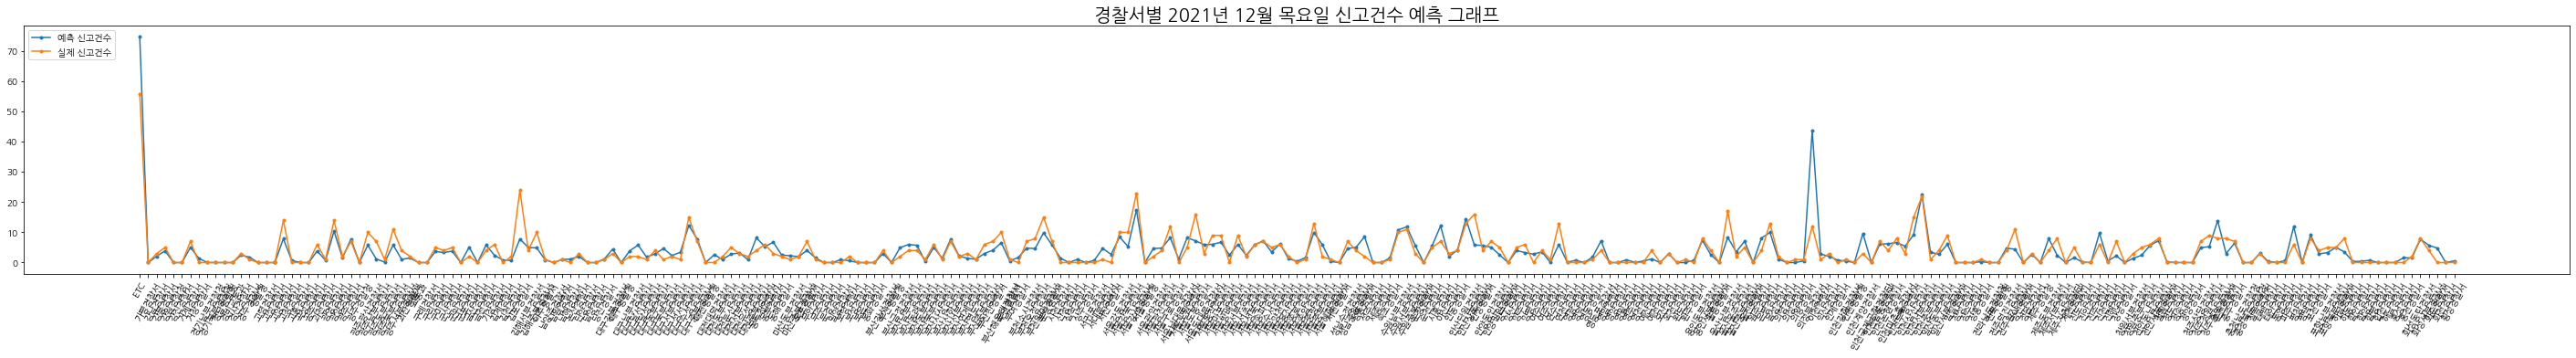

In [32]:
plt.figure(figsize=(50, 5))
plt.plot(result, marker = 'o', markersize = 3)
plt.legend(['예측 신고건수','실제 신고건수'], loc='upper left')
plt.xticks(rotation=60)

plt.title("경찰서별 2021년 12월 목요일 신고건수 예측 그래프", size=20)

mpl.rc('axes', unicode_minus=False)